In [1]:
# import the libraries as shown below
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
import itertools
from keras.models import load_model
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
train_path = r'/content/drive/MyDrive/Halal Fishes Dataset/JPG Halal Fish Splitted dataset/train'
valid_path = r'/content/drive/MyDrive/Halal Fishes Dataset/JPG Halal Fish Splitted dataset/test'

In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 5s 0us/step


In [5]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [6]:
# useful for getting number of output classes
folders = glob(r'/content/drive/MyDrive/Halal Fishes Dataset/JPG Halal Fish Splitted dataset/train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [8]:
# create a model object
model_IV3_final = Model(inputs=inception.input, outputs=prediction)
prediction = Dense(len(folders), activation='softmax')(x)

In [9]:
# tell the model what cost and optimization method to use
model_IV3_final.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
model_IV3_final.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [11]:
# Use the Image Data Generator to import the images from the dataset
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 133 images belonging to 20 classes.
Found 70 images belonging to 20 classes.


In [13]:
# fit the model
# Run the cell. It will take some time to execute
history_IV3_final = model_IV3_final.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)



Epoch 1/10
5/5 [==============================] - 203s 42s/step - loss: 20.3788 - accuracy: 0.2180 - val_loss: 19.4553 - val_accuracy: 0.3143
Epoch 2/10
5/5 [==============================] - 25s 5s/step - loss: 13.6298 - accuracy: 0.4361 - val_loss: 16.4615 - val_accuracy: 0.4714
Epoch 3/10
5/5 [==============================] - 19s 4s/step - loss: 7.1473 - accuracy: 0.6767 - val_loss: 11.3302 - val_accuracy: 0.4143
Epoch 4/10
5/5 [==============================] - 20s 4s/step - loss: 4.9762 - accuracy: 0.7068 - val_loss: 10.1629 - val_accuracy: 0.5286
Epoch 5/10
5/5 [==============================] - 23s 5s/step - loss: 3.7518 - accuracy: 0.7895 - val_loss: 8.7606 - val_accuracy: 0.6000
Epoch 6/10
5/5 [==============================] - 19s 4s/step - loss: 2.0026 - accuracy: 0.8947 - val_loss: 6.9991 - val_accuracy: 0.5857
Epoch 7/10
5/5 [==============================] - 21s 4s/step - loss: 1.8340 - accuracy: 0.8647 - val_loss: 6.7803 - val_accuracy: 0.6286
Epoch 8/10
5/5 [==========

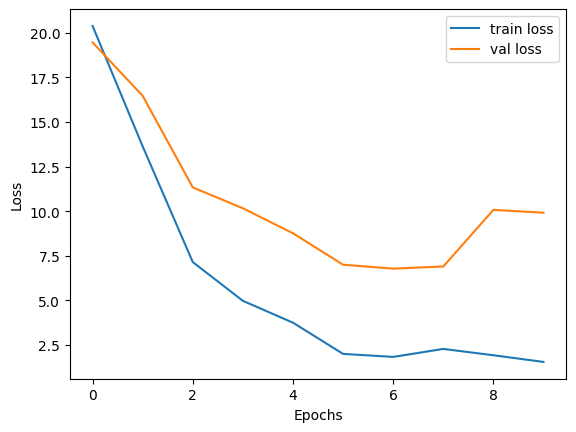

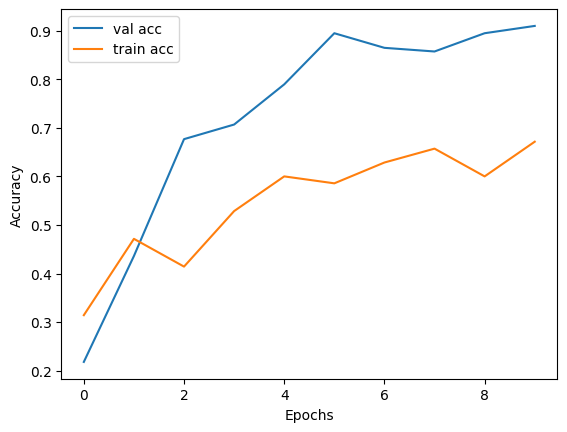

In [14]:
#plot the loss
plt.plot(history_IV3_final.history['loss'], label='train loss')
plt.plot(history_IV3_final.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# plot the accuracy
plt.plot(history_IV3_final.history['accuracy'], label='val acc')
plt.plot(history_IV3_final.history['val_accuracy'], label='train acc')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [19]:
model_IV3_final.save('InceptionV3_Final_Model.h5')
print("model saved to Disk.")
model_IV3_new_final = load_model('InceptionV3_Final_Model.h5')
print("model loaded")

model saved to Disk.
model loaded


In [20]:
model_IV3_new_final.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [22]:
test_generator = ImageDataGenerator(rescale = 1./255)
test_data_generator = test_generator.flow_from_directory(
    valid_path,
    target_size=(224, 224),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

Found 70 images belonging to 20 classes.


In [23]:
predictions = model_IV3_new_final.predict(test_data_generator, steps=test_steps_per_epoch)

3/3 [==============================] - 9s 2s/step


In [24]:
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

print(test_data_generator.classes)
print(predicted_classes)

[ 0  0  0  0  1  1  1  2  2  2  2  2  3  3  3  4  4  5  5  5  6  6  6  6
  7  7  8  8  8  9  9 10 10 10 11 11 11 11 11 11 11 12 12 13 13 14 14 14
 15 15 15 15 15 15 15 16 16 16 16 16 16 17 17 18 19 19 19 19 19 19]
[19 19  0  0  1  1  1  2  2  2  2 14 14 14  3 14 19 19 19 19  6  6  6  6
 19  7  8  8  8  9  9 15 10 10 14 12 12  2  2 11 14 12 12 13 13 14 14 14
 15 15 14 15 15 15 15 16 16 16 16 16 16 14 14 18 19 19  2 14 19 19]


In [25]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())


In [26]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
cmat = confusion_matrix(true_classes, predicted_classes)
acc = accuracy_score(true_classes, predicted_classes)
print(report)
print(cmat)
print(acc)

                        precision    recall  f1-score   support

         Big raho Fish       1.00      0.50      0.67         4
      Black Water Rahu       1.00      1.00      1.00         3
              Cat fish       0.57      0.80      0.67         5
            Dhari Fish       1.00      0.33      0.50         3
           Dilwar fish       0.00      0.00      0.00         2
            Heera Fish       0.00      0.00      0.00         3
    Jalabi Paplat Fish       1.00      1.00      1.00         4
              Moi Fish       1.00      0.50      0.67         2
           Naiser Fish       1.00      1.00      1.00         3
           Paplet Fish       1.00      1.00      1.00         2
           Parrot Fish       1.00      0.67      0.80         3
             Rahu Fish       1.00      0.14      0.25         7
      Red snapper Fish       0.50      1.00      0.67         2
Ringi  like a cat fish       1.00      1.00      1.00         2
             Safi Fish       0.23      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
# importing os module
import os

# Get the list of all files and directories
path = "/content/drive/MyDrive/Halal Fishes Dataset/JPG Halal Fish Splitted dataset/train"
dir_list = os.listdir(path)

print("Files and directories in '", path, "' :")

# print the list
print(dir_list)


Files and directories in ' /content/drive/MyDrive/Halal Fishes Dataset/JPG Halal Fish Splitted dataset/train ' :
['Tacan Fish', 'Zandia or Dhandia Fish', 'Sarum fish', 'Safi Fish', 'remaining', 'Silver carp Fish', 'Ringi  like a cat fish', 'Red snapper Fish', 'Rahu Fish', 'Heera Fish', 'Paplet Fish', 'Dhari Fish', 'Naiser Fish', 'Dilwar fish', 'Cat fish', 'Jalabi Paplat Fish', 'Black Water Rahu', 'Moi Fish', 'Parrot Fish', 'Big raho Fish']


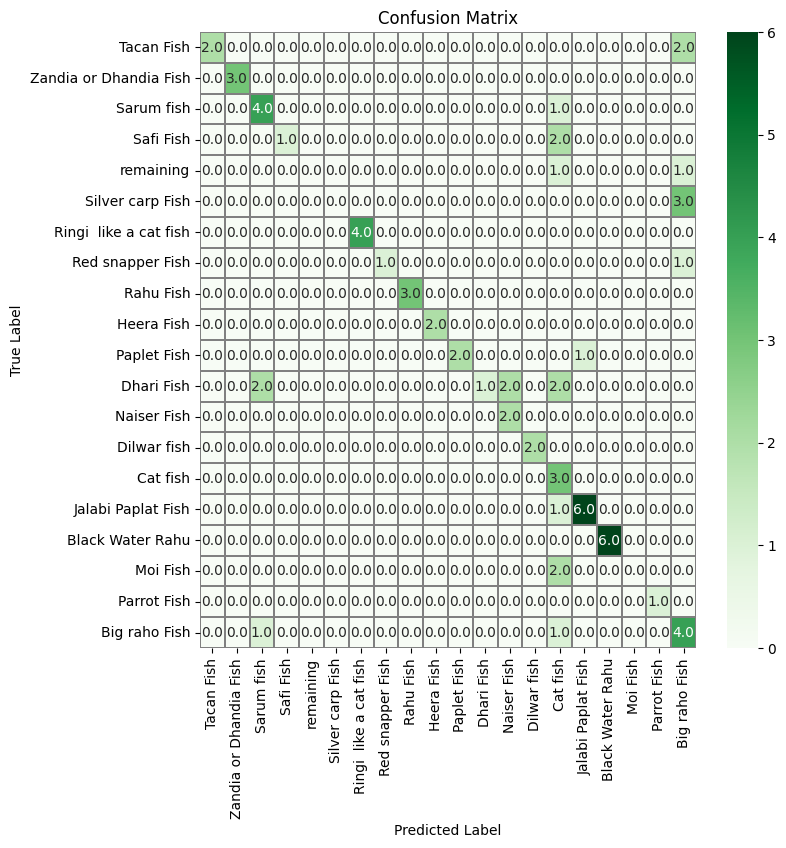

In [29]:
confusion_mtx = confusion_matrix(true_classes, predicted_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax.set_xticklabels(['Tacan Fish', 'Zandia or Dhandia Fish', 'Sarum fish', 'Safi Fish', 'remaining', 'Silver carp Fish', 'Ringi  like a cat fish', 'Red snapper Fish', 'Rahu Fish', 'Heera Fish', 'Paplet Fish', 'Dhari Fish', 'Naiser Fish', 'Dilwar fish', 'Cat fish', 'Jalabi Paplat Fish', 'Black Water Rahu', 'Moi Fish', 'Parrot Fish', 'Big raho Fish'])
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_yticklabels(['Tacan Fish', 'Zandia or Dhandia Fish', 'Sarum fish', 'Safi Fish', 'remaining', 'Silver carp Fish', 'Ringi  like a cat fish', 'Red snapper Fish', 'Rahu Fish', 'Heera Fish', 'Paplet Fish', 'Dhari Fish', 'Naiser Fish', 'Dilwar fish', 'Cat fish', 'Jalabi Paplat Fish', 'Black Water Rahu', 'Moi Fish', 'Parrot Fish', 'Big raho Fish'])

plt.title("Confusion Matrix")
plt.show()

In [30]:
def get_tpr_fnr_fpr_tnr(cm):
    """
    This function returns class-wise TPR, FNR, FPR & TNR
    [[cm]]: a 2-D array of a multiclass confusion matrix
            where horizontal axes represent actual classes
            and vertical axes represent predicted classes
    {output}: a dictionary of class-wise accuracy parameters
    """
    dict_metric = dict()
    n = len(cm[0])
    row_sums = cm.sum(axis=1)
    col_sums = cm.sum(axis=0)
    array_sum = sum(sum(cm))
    #initialize a blank nested dictionary
    for i in range(1, n+1):
        keys = str(i)
        dict_metric[keys] = {"TPR":0, "FNR":0, "FPR":0, "TNR":0}
    # calculate and store class-wise TPR, FNR, FPR, TNR
    for i in range(n):
        for j in range(n):
            if i == j:
                keys = str(i+1)
                tp = cm[i, j]
                fn = row_sums[i] - cm[i, j]
                dict_metric[keys]["TPR"] = tp / (tp + fn)
                dict_metric[keys]["FNR"] = fn / (tp + fn)
                fp = col_sums[i] - cm[i, j]
                tn = array_sum - tp - fn - fp
                dict_metric[keys]["FPR"] = fp / (fp + tn)
                dict_metric[keys]["TNR"] = tn / (fp + tn)
    return dict_metric

In [31]:
import pandas as pd
df = pd.DataFrame(get_tpr_fnr_fpr_tnr(confusion_mtx)).transpose()
classes = ['Tacan Fish', 'Zandia or Dhandia Fish', 'Sarum fish', 'Safi Fish', 'remaining', 'Silver carp Fish', 'Ringi  like a cat fish', 'Red snapper Fish', 'Rahu Fish', 'Heera Fish', 'Paplet Fish', 'Dhari Fish', 'Naiser Fish', 'Dilwar fish', 'Cat fish', 'Jalabi Paplat Fish', 'Black Water Rahu', 'Moi Fish', 'Parrot Fish', 'Big raho Fish']
df['CLASSES'] = classes
df.set_index('CLASSES', inplace=True)
df

,TPR,FNR,FPR,TNR
CLASSES,,,,
Tacan Fish,0.500000,0.500000,0.000000,1.000000
Zandia or Dhandia Fish,1.000000,0.000000,0.000000,1.000000
Sarum fish,0.800000,0.200000,0.046154,0.953846
Safi Fish,0.333333,0.666667,0.000000,1.000000
remaining,0.000000,1.000000,0.000000,1.000000
Silver carp Fish,0.000000,1.000000,0.000000,1.000000
Ringi like a cat fish,1.000000,0.000000,0.000000,1.000000
Red snapper Fish,0.500000,0.500000,0.000000,1.000000
Rahu Fish,1.000000,0.000000,0.000000,1.000000


In [32]:
print("InceptionV3 analysis: ")
print("TPR average: ",df["TPR"].mean())
print("FPR average: ",df["FPR"].mean())
print("TNR average: ",df["TNR"].mean())
print("FNR average: ",df["FNR"].mean())

InceptionV3 analysis: 
TPR average:  0.6733333333333333
FPR average:  0.017503367903801397
TNR average:  0.9824966320961985
FNR average:  0.3266666666666666
